Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)

 * 2022/06/28 - updated
 * 2021/12/13 - initial revision

<img align="left" width="50%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" >

### Read the Portal of Experimental Ocean Acidification Data
https://dataportals.pangaea.de/oa-icc/index2.php?

#### DATA SEARCH

https://wiki.pangaea.de/wiki/Main_Page

The harvested data centers are available through a large, all-containing, public, read-only Elasticsearch node; available at: http://ws.pangaea.de/es/portals/pansimple/_search?pretty

In [1]:
import json
import urllib
import pandas as pd

In [2]:
# Extract all articles (citation_date and keyword included)

url = 'http://ws.pangaea.de/es/dataportal-oa-icc/pansimple/_search?size=2000&_source_include=citation_date,keyword'

jsonurl = urllib.request.urlopen(url)
jsonread = json.loads(jsonurl.read())
jsonurl.close()

In [3]:
# Transform the resulting json to a pandas dataframe

df = pd.DataFrame.from_dict(jsonread['hits']['hits'])
df

,_index,_type,_id,_score,_source
0,portals_v1,pansimple,PANGAEA.754779,1.0,"{'citation_date': '2010-12-07', 'keyword': ['A..."
1,portals_v1,pansimple,PANGAEA.752286,1.0,"{'citation_date': '2010-11-02', 'keyword': ['A..."
2,portals_v1,pansimple,PANGAEA.891075,1.0,"{'citation_date': '2018-06-15', 'keyword': ['A..."
3,portals_v1,pansimple,PANGAEA.771570,1.0,"{'citation_date': '2011-11-18', 'keyword': ['A..."
4,portals_v1,pansimple,PANGAEA.763988,1.0,"{'citation_date': '2011-08-19', 'keyword': ['A..."
...,...,...,...,...,...
1479,portals_v1,pansimple,PANGAEA.943395,1.0,"{'keyword': ['Animalia', 'Arthropoda', 'Behavi..."
1480,portals_v1,pansimple,PANGAEA.952656,1.0,"{'citation_date': '2022-12-20', 'keyword': ['A..."
1481,portals_v1,pansimple,PANGAEA.770067,1.0,"{'citation_date': '2011-09-23', 'keyword': ['B..."
1482,portals_v1,pansimple,PANGAEA.960042,1.0,"{'keyword': ['Benthos', 'Calcification/Dissolu..."


In [4]:
# Reorganize _source dictionnary as columns

# Sometimes only {} and not {'keyword: [...]'}
df['citation_date'] = df['_source'].apply(
    lambda x: eval(str(x))['citation_date'] if 'citation_date' in eval(str(x)).keys() else None)
df['keyword'] = df['_source'].apply(
    lambda x: eval(str(x))['keyword'] if 'keyword' in eval(str(x)).keys() else None)

# Force to be a list (not the case when only 1 keyword)
df['keyword'] = df['keyword'].apply(lambda x: [x] if type(x) is not list else x)

In [5]:
# Drop unused columns

df.drop(['_score','_type','_index','_source'], axis=1, inplace=True)
df.sort_values(by=['citation_date'])

,_id,citation_date,keyword
153,PANGAEA.721856,2009-06-23,"[Benthos, Calcification/Dissolution, Coast and..."
1112,PANGAEA.726862,2009-08-27,"[Bacteria, Biomass/Abundance/Elemental composi..."
813,PANGAEA.726856,2009-08-27,"[Animalia, Arctic, Bottles or small containers..."
160,PANGAEA.727545,2009-09-16,"[Benthos, Calcification/Dissolution, Coast and..."
191,PANGAEA.728723,2009-10-23,"[Animalia, Atractoscion nobilis, Behaviour, Bi..."
...,...,...,...
1476,PANGAEA.942326,None,"[Animalia, Benthic animals, Benthos, Bottles o..."
1477,PANGAEA.934173,None,"[Animalia, Bottles or small containers/Aquaria..."
1478,PANGAEA.933580,None,"[Bottles or small containers/Aquaria (<20 L), ..."
1479,PANGAEA.943395,None,"[Animalia, Arthropoda, Behaviour, Bottles or s..."


In [6]:
df[df['_id'] == 'PANGAEA.869837']

,_id,citation_date,keyword


In [7]:
# Extract all keywords

allKeywordsDB = sorted(df['keyword'].apply(pd.Series).stack().unique())
print(len(allKeywordsDB))
allKeywordsDB

1242


['Abatus cavernosus',
 'Abra alba',
 'Abra nitida',
 'Abra prismatica',
 'Abra tenuis',
 'Abudefduf vaigiensis',
 'Acanthaster planci',
 'Acanthochromis polyacanthus',
 'Acanthopagrus schlegelii',
 'Acanthophora spicifera',
 'Acartia bifilosa',
 'Acartia clausi',
 'Acartia grani',
 'Acartia hudsonica',
 'Acartia pacifica',
 'Acartia sp.',
 'Acartia tonsa',
 'Acetabularia acetabulum',
 'Acid-base regulation',
 'Acinetospora crinita',
 'Acipenser baerii',
 'Acropora cerealis',
 'Acropora cervicornis',
 'Acropora cytherea',
 'Acropora digitifera',
 'Acropora eurystoma',
 'Acropora formosa',
 'Acropora horrida',
 'Acropora humilis',
 'Acropora hyacinthus',
 'Acropora intermedia',
 'Acropora millepora',
 'Acropora muricata',
 'Acropora palmata',
 'Acropora pulchra',
 'Acropora samoensis',
 'Acropora solitaryensis',
 'Acropora sp.',
 'Acropora spicifera',
 'Acropora tenuis',
 'Acropora verweyi',
 'Acropora yongei',
 'Acrosorium ciliolatum',
 'Acteon tornatilis',
 'Adamussium colbecki',
 'Ade

In [8]:
# Example of a selection on a date range

s = df[df['citation_date'].between('2016-01-01', '2016-02-31')]
print(len(s))
s.sort_values(by=['citation_date'])

0


,_id,citation_date,keyword


In [10]:
# Read the CSV file that defines category/keyword relation

df1 = pd.read_csv('https://oa-icc.ipsl.fr/OA-ICC_keywords_current.csv')
df1

,Category,Keywords
0,Geographical location,Antarctic
1,Geographical location,Arctic
2,Geographical location,Baltic Sea
3,Geographical location,Indian Ocean
4,Geographical location,Mediterranean Sea
...,...,...
1236,Type of community,Rocky-shore community
1237,Type of community,Soft-bottom community
1238,Type of study,Field experiment
1239,Type of study,Field observation


In [11]:
# Aggregate keywords by category

dfCategory = df1.groupby('Category').aggregate(lambda x: sorted(set(x)))
dfCategory

,Keywords
Category,
Geographical location,"[Antarctic, Arctic, Baltic Sea, Indian Ocean, ..."
Incubation type,"[Bottles or small containers/Aquaria (<20 L), ..."
Latitudinal location,"[Polar, Temperate, Tropical]"
Living compartment,"[Benthos, Pelagos]"
Marine habitat,"[Brackish waters, Coast and continental shelf,..."
Multiple stressors,"[Inorganic toxins, Light, Macro-nutrients, Mic..."
OA Natural analog,"[CO2 vent, Estuary, Upwelling]"
Studied parameter or process,"[Acid-base regulation, Behaviour, Biomass/Abun..."
Study focus,"[Entire community, Single species, Species int..."


In [12]:
# Define a python dictionnary for each category

dictCategory = dfCategory.to_dict(orient='dict')['Keywords']
dictCategory

{'Geographical location': ['Antarctic',
  'Arctic',
  'Baltic Sea',
  'Indian Ocean',
  'Mediterranean Sea',
  'North Atlantic',
  'North Pacific',
  'Not applicable',
  'Red Sea',
  'South Atlantic',
  'South Pacific'],
 'Incubation type': ['Bottles or small containers/Aquaria (<20 L)',
  'Containers and aquaria (20-1000 L or < 1 m**2)',
  'Mesocosm or benthocosm'],
 'Latitudinal location': ['Polar', 'Temperate', 'Tropical'],
 'Living compartment': ['Benthos', 'Pelagos'],
 'Marine habitat': ['Brackish waters',
  'Coast and continental shelf',
  'Deep-sea',
  'Laboratory strains',
  'Open ocean'],
 'Multiple stressors': ['Inorganic toxins',
  'Light',
  'Macro-nutrients',
  'Micro-nutrients',
  'Organic toxins',
  'Other',
  'Oxygen',
  'Salinity',
  'Temperature'],
 'OA Natural analog': ['CO2 vent', 'Estuary', 'Upwelling'],
 'Studied parameter or process': ['Acid-base regulation',
  'Behaviour',
  'Biomass/Abundance/Elemental composition',
  'Calcification/Dissolution',
  'Community c

In [13]:
# Extract all keywords from the OA-ICC_keywords_current.csv

allKeywords = dfCategory['Keywords'].apply(pd.Series).stack().unique()
print(len(allKeywords))
allKeywords

1241


array(['Antarctic', 'Arctic', 'Baltic Sea', ..., 'Field experiment',
       'Field observation', 'Laboratory experiment'], dtype=object)

In [14]:
# Numbers of effective keywords used from the different category keywords

for category in sorted(dictCategory.keys()):
    searchedKeywords = dfCategory[dfCategory.index == category]['Keywords'][0]
    df[category] = df['keyword'].apply(lambda x: list(set(x) & set(searchedKeywords)) if x != None else [])
    z = df[category].apply(pd.Series).stack()
    print("=================================================================")
    print("%04d/%04d %s" % (len(z.unique()), len(searchedKeywords), category))
    print(z.unique())
    diff = set(searchedKeywords) - set(z)
    if len(diff) != 0:
        print('\n-----> Never used:', list(diff)[0:10])
    print()

0011/0011 Geographical location
['North Atlantic' 'Indian Ocean' 'Mediterranean Sea' 'South Pacific'
 'Baltic Sea' 'North Pacific' 'Arctic' 'Not applicable' 'Antarctic'
 'Red Sea' 'South Atlantic']

0003/0003 Incubation type
['Bottles or small containers/Aquaria (<20 L)' 'Mesocosm or benthocosm'
 'Containers and aquaria (20-1000 L or < 1 m**2)']

0003/0003 Latitudinal location
['Temperate' 'Polar' 'Tropical']

0002/0002 Living compartment
['Benthos' 'Pelagos']

0005/0005 Marine habitat
['Coast and continental shelf' 'Laboratory strains' 'Brackish waters'
 'Open ocean' 'Deep-sea']

0009/0009 Multiple stressors
['Macro-nutrients' 'Temperature' 'Other' 'Light' 'Oxygen'
 'Inorganic toxins' 'Micro-nutrients' 'Salinity' 'Organic toxins']

0003/0003 OA Natural analog
['CO2 vent' 'Estuary' 'Upwelling']

0015/0015 Studied parameter or process
['Calcification/Dissolution' 'Mortality/Survival'
 'Biomass/Abundance/Elemental composition' 'Development'
 'Growth/Morphology' 'Reproduction' 'Primary pr

In [15]:
# Example of keywords category 

print(dictCategory['Geographical location'])

['Antarctic', 'Arctic', 'Baltic Sea', 'Indian Ocean', 'Mediterranean Sea', 'North Atlantic', 'North Pacific', 'Not applicable', 'Red Sea', 'South Atlantic', 'South Pacific']


In [16]:
# Find different keywords or all keywords, combined with date ranges (before 2015 and after)

#selection = ['North Pacific', 'South Pacific']
#selection = ['Mediterranean Sea']
selection = dictCategory['Geographical location']    # all keywords

s_total = df[df['Geographical location'].apply(lambda x: bool(set(x) & set(selection)))]
s_period1 = s_total[s_total['citation_date'].between('1950-01-01', '2014-12-31')]
s_period2 = s_total[s_total['citation_date'].between('2015-01-01', '2030-12-31')]

print('Total: ', len(s_total))
print('< 2015', len(s_period1))
print('>=  2015', len(s_period2))

s_period2.sort_values(by=['citation_date'])

Total:  1481
< 2015 218
>=  2015 480


,_id,citation_date,keyword,Geographical location,Incubation type,Latitudinal location,Living compartment,Marine habitat,Multiple stressors,OA Natural analog,Studied parameter or process,Study focus,Targeted group,Targeted kingdom,Targeted phylum,Targeted species,Type of community,Type of study
743,PANGAEA.843600,2015-03-05,"[Bottles or small containers/Aquaria (<20 L), ...",[Not applicable],[Bottles or small containers/Aquaria (<20 L)],[],[Pelagos],[Laboratory strains],[Light],[],"[Primary production/Photosynthesis, Calcificat...",[Single species],[Phytoplankton],[Chromista],[Haptophyta],[Emiliania huxleyi],[],[Laboratory experiment]
280,PANGAEA.846484,2015-05-27,"[Benthos, Bottles or small containers/Aquaria ...",[South Pacific],[Bottles or small containers/Aquaria (<20 L)],[Temperate],[Benthos],[Coast and continental shelf],[Light],[],"[Primary production/Photosynthesis, Growth/Mor...",[Single species],[Macroalgae],[Plantae],[Chlorophyta],[Ulva rigida],[],[Laboratory experiment]
240,PANGAEA.846486,2015-05-27,"[Alexandrium fundyense, Bottles or small conta...",[North Atlantic],[Bottles or small containers/Aquaria (<20 L)],[],[Pelagos],[Laboratory strains],[],[],"[Growth/Morphology, Immunology/Self-protection]",[Single species],[Phytoplankton],[Chromista],[Myzozoa],[Alexandrium fundyense],[],[Laboratory experiment]
894,PANGAEA.846530,2015-05-28,"[Adelosina longirostra, Affinetrina gualtieria...",[Mediterranean Sea],[],[Temperate],[Benthos],[Coast and continental shelf],[],[CO2 vent],"[Community composition and diversity, Biomass/...",[Entire community],[],[],[],"[Pseudotriloculina sp., Haynesina depressula, ...",[Rocky-shore community],[Field observation]
883,PANGAEA.846682,2015-06-03,"[Benthos, Calcification/Dissolution, Coast and...",[North Pacific],[Containers and aquaria (20-1000 L or < 1 m**2)],[Tropical],[Benthos],[Coast and continental shelf],[Temperature],[],"[Primary production/Photosynthesis, Calcificat...",[Entire community],[],[],[],[],[Rocky-shore community],[Laboratory experiment]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659,PANGAEA.959026,2023-05-19,"[Animalia, Behaviour, Chordata, Coast and cont...",[South Pacific],[Mesocosm or benthocosm],[Temperate],[Pelagos],[Coast and continental shelf],[Temperature],[],"[Respiration, Behaviour]",[Single species],[Nekton],[Animalia],[Chordata],[Seriola lalandi],[],[Laboratory experiment]
655,PANGAEA.959214,2023-05-23,"[Baltic Sea, Biomass/Abundance/Elemental compo...",[Baltic Sea],[Mesocosm or benthocosm],[Temperate],[Pelagos],[Coast and continental shelf],[Temperature],[],"[Community composition and diversity, Biomass/...",[Entire community],[],[],[],[],[],[Laboratory experiment]
658,PANGAEA.959452,2023-05-25,"[Animalia, Benthic animals, Benthos, Cnidaria,...",[Not applicable],[Containers and aquaria (20-1000 L or < 1 m**2)],[],[Benthos],[Laboratory strains],[],[],[Growth/Morphology],[Single species],[Benthic animals],[Animalia],[Cnidaria],[Stylophora pistillata],[],[Laboratory experiment]
701,PANGAEA.959516,2023-05-29,"[Amphiprion percula, Animalia, Behaviour, Chor...",[South Pacific],[Containers and aquaria (20-1000 L or < 1 m**2)],[Tropical],[Pelagos],[Coast and continental shelf],[Other],[],"[Mortality/Survival, Behaviour]",[Single species],[Nekton],[Animalia],[Chordata],[Amphiprion percula],[],[Laboratory experiment]


In [17]:
# Example of an inversing boolean mask (here all articles that does not have a living compartment keyword)

selection = ['Pelagos','Benthos']
s = df[~df['Living compartment'].apply(lambda x: bool(set(x) & set(selection)))]
print(len(s))
s.sort_values(by=['citation_date'])

18


,_id,citation_date,keyword,Geographical location,Incubation type,Latitudinal location,Living compartment,Marine habitat,Multiple stressors,OA Natural analog,Studied parameter or process,Study focus,Targeted group,Targeted kingdom,Targeted phylum,Targeted species,Type of community,Type of study
1453,PANGAEA.767576,2011-08-31,"[Antarctic, Emiliania huxleyi, Indian Ocean, N...","[South Atlantic, Indian Ocean, North Atlantic,...",[],[],[],[],[],[],[],[],[Phytoplankton],[],[],[Emiliania huxleyi],[],[]
754,PANGAEA.912222,2020-02-19,"[Animalia, Benthic animals, Bottles or small c...",[Not applicable],[Bottles or small containers/Aquaria (<20 L)],[],[],[Laboratory strains],[Light],[],[Calcification/Dissolution],[Single species],[Benthic animals],[Animalia],[Cnidaria],[Stylophora pistillata],[],[Laboratory experiment]
667,PANGAEA.922459,2020-09-08,"[Biomass/Abundance/Elemental composition, Bott...",[Not applicable],[Bottles or small containers/Aquaria (<20 L)],[],[],[Laboratory strains],[Light],[],"[Primary production/Photosynthesis, Growth/Mor...",[Single species],[Phytoplankton],[Chromista],[Ochrophyta],[Thalassiosira pseudonana],[],[Laboratory experiment]
633,PANGAEA.939814,2021-12-29,"[Chromista, Gene expression (incl. proteomics)...",[Not applicable],[],[],[],[Laboratory strains],[],[],"[Primary production/Photosynthesis, Gene expre...",[Single species],[Phytoplankton],[Chromista],[Myzozoa],[Symbiodinium microadriaticum],[],[Laboratory experiment]
1065,PANGAEA.958450,2023-05-04,"[Animalia, Arthropoda, Benthic animals, Biomas...",[Not applicable],[Containers and aquaria (20-1000 L or < 1 m**2)],[],[],[Laboratory strains],[Temperature],[],"[Other studied parameter or process, Growth/Mo...",[Single species],[Benthic animals],[Animalia],[Arthropoda],"[Paralithodes platypus, Paralithodes camtschat...",[],[Laboratory experiment]
1122,PANGAEA.958503,2023-05-05,"[Biomass/Abundance/Elemental composition, Bott...",[Not applicable],[Bottles or small containers/Aquaria (<20 L)],[],[],[Laboratory strains],[Macro-nutrients],[],"[Primary production/Photosynthesis, Calcificat...",[Single species],[Phytoplankton],[Chromista],[Haptophyta],[Emiliania huxleyi],[],[Laboratory experiment]
634,PANGAEA.958552,2023-05-08,"[Animalia, Benthic animals, Containers and aqu...",[Not applicable],[Containers and aquaria (20-1000 L or < 1 m**2)],[],[],[Laboratory strains],[],[],"[Mortality/Survival, Other studied parameter o...",[Single species],[Benthic animals],[Animalia],[Mollusca],"[Crassostrea hongkongensis, Crassostrea angulata]",[],[Laboratory experiment]
284,PANGAEA.756663,None,"[Animalia, Benthic animals, Bottles or small c...",[North Atlantic],[Bottles or small containers/Aquaria (<20 L)],[Temperate],[],[Coast and continental shelf],[],[],"[Respiration, Growth/Morphology, Other metabol...",[Single species],[Benthic animals],[Animalia],[Mollusca],[Mytilus edulis],[],[Laboratory experiment]
433,PANGAEA.829084,None,"[Nodularia spumigena, Not applicable]",[Not applicable],[],[],[],[],[],[],[],[],[],[],[],[Nodularia spumigena],[],[]
462,PANGAEA.830817,None,"[Calcification/Dissolution, Laboratory experim...",[Not applicable],[],[],[],[Laboratory strains],[Micro-nutrients],[],[Calcification/Dissolution],[],[],[],[],[Stylophora pistillata],[],[Laboratory experiment]


In [19]:
dhisto = pd.DataFrame()

year = 2015
list1 = ['Targeted phylum', 'Study focus', 'Studied parameter or process', 'Multiple stressors']

for l in list1:
    selection = dictCategory[l]
    s_total = df[df[l].apply(lambda x: bool(set(x) & set(selection)))]
    s_period1 = s_total[s_total['citation_date'].between('1950-01-01', str(year-1)+'-12-31')]
    s_period2 = s_total[s_total['citation_date'].between(str(year)+'-01-01', '2030-12-31')]
    
    dhisto = dhisto._append({'name': l, 
                            'before ' + str(year): 100 * len(s_period1)/len(s_total), 
                            'after ' + str(year):  100 * len(s_period2)/len(s_total)}, 
                           ignore_index=True)

dhisto.set_index('name', inplace=True)
dhisto

,before 2015,after 2015
name,,
Targeted phylum,15.247364,33.252230
Study focus,14.682003,32.543978
Studied parameter or process,14.701897,32.452575
Multiple stressors,10.725552,37.697161


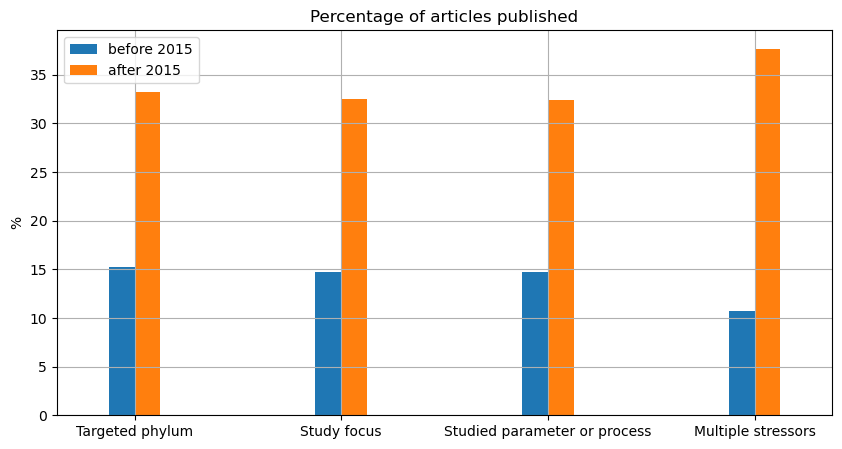

In [20]:
p = dhisto.plot.bar(title="Percentage of articles published", 
                xlabel="", ylabel="%",
                rot=0, grid=True, figsize=[10,5], width=0.25)

In [21]:
#df[df['Geographical location'].apply(lambda x: bool(set(x) & set(["North Pacific"])))]
#df[df['Geographical location'].apply(lambda x: bool(set(x) & set(["Not applicable"])))]
a = df[df['Geographical location'].apply(lambda x: len(set(x)) == 0)]
a

,_id,citation_date,keyword,Geographical location,Incubation type,Latitudinal location,Living compartment,Marine habitat,Multiple stressors,OA Natural analog,Studied parameter or process,Study focus,Targeted group,Targeted kingdom,Targeted phylum,Targeted species,Type of community,Type of study
832,PANGAEA.938216,2021-11-16,"[Animalia, Benthic animals, Benthos, Bottles o...",[],[Bottles or small containers/Aquaria (<20 L)],[Temperate],[Benthos],[Coast and continental shelf],[Temperature],[],[Growth/Morphology],[Single species],[Benthic animals],[Animalia],[Mollusca],"[Columbella rustica, Nassarius nitidus]",[],[Laboratory experiment]
1212,PANGAEA.941419,None,"[Animalia, Artemia franciscana, Arthropoda, Be...",[],[Bottles or small containers/Aquaria (<20 L)],[],[Benthos],[],[],[],"[Mortality/Survival, Growth/Morphology, Reprod...",[Single species],[Benthic animals],[Animalia],[Arthropoda],[Artemia franciscana],[],[Laboratory experiment]
1304,PANGAEA.952481,None,"[Animalia, Behaviour, Chordata, Coast and cont...",[],[Containers and aquaria (20-1000 L or < 1 m**2)],[Temperate],[Pelagos],[Coast and continental shelf],[],[],[Behaviour],[Single species],[Nekton],[Animalia],[Chordata],[Dicentrarchus labrax],[],[Laboratory experiment]


In [22]:
a.to_csv('Geographical_location_empty.csv', index=False)

In [23]:
# print(dictCategory['Targeted group'])
print(dictCategory['Geographical location'])

['Antarctic', 'Arctic', 'Baltic Sea', 'Indian Ocean', 'Mediterranean Sea', 'North Atlantic', 'North Pacific', 'Not applicable', 'Red Sea', 'South Atlantic', 'South Pacific']


In [24]:
import matplotlib.pyplot as plt

### Histogram with Before and After

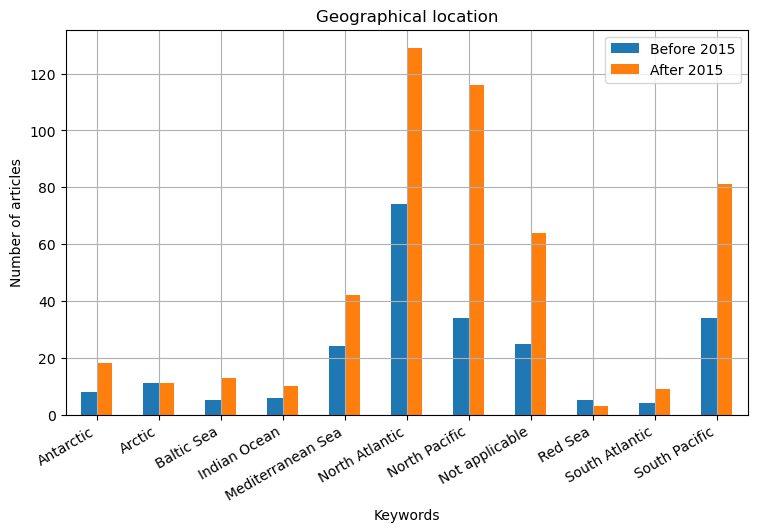

In [26]:
year = 2015

# All categories except
categories = df.columns
categories = categories.drop(['_id', 'citation_date', 'keyword', 'Targeted species'])

for category in ['Geographical location'] :
#for category in categories :

    dhisto = pd.DataFrame()
    
    listKeywords = dictCategory[category]

    for k in listKeywords:
        s_total = df[df[category].apply(lambda x: bool(set(x) & set([k])))]
        s_period1 = s_total[s_total['citation_date'].between('1950-01-01', str(year-1)+'-12-31')]
        s_period2 = s_total[s_total['citation_date'].between(str(year)+'-01-01', '2030-12-31')]
    
        dhisto = dhisto._append({ 'name': k, 
                             'Before ' + str(year): len(s_period1), 
                             'After ' + str(year):  len(s_period2) }, 
                           ignore_index=True)

    dhisto.set_index('name', inplace=True)

    p = dhisto.plot.bar(title=category, 
                xlabel="Keywords", ylabel="Number of articles",
                grid=True, figsize=[0.8*len(listKeywords) ,5], width=0.5)
    plt.xticks(rotation=30, horizontalalignment='right')
    plt.savefig(category.replace(' ', '_') + '_1.png', 
                facecolor="white", transparent=False, bbox_inches="tight")
    plt.show()
    

### Histogram with Total and Before

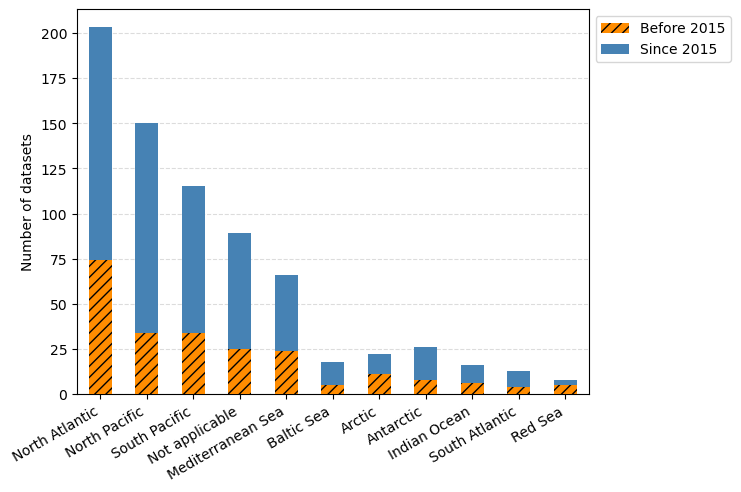

                   Before 2015  Since 2015  Total
name                                             
North Atlantic              74         129    416
North Pacific               34         116    325
South Pacific               34          81    243
Not applicable              25          64    190
Mediterranean Sea           24          42    125
Baltic Sea                   5          13     60
Arctic                      11          11     51
Antarctic                    8          18     49
Indian Ocean                 6          10     30
South Atlantic               4           9     22
Red Sea                      5           3     15


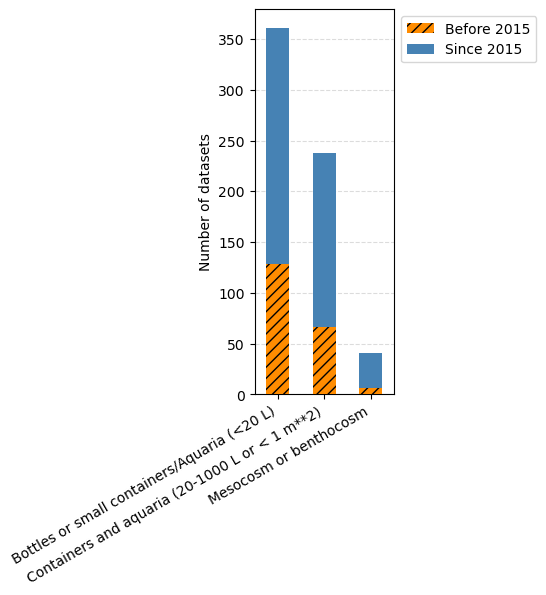

                                                Before 2015  Since 2015  Total
name                                                                          
Bottles or small containers/Aquaria (<20 L)             128         233    744
Containers and aquaria (20-1000 L or < 1 m**2)           66         172    494
Mesocosm or benthocosm                                    6          35    107


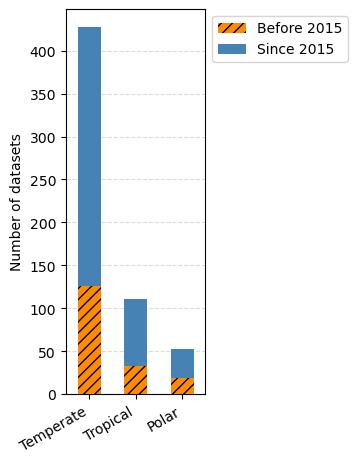

           Before 2015  Since 2015  Total
name                                     
Temperate          126         301    893
Tropical            33          78    254
Polar               19          34    109


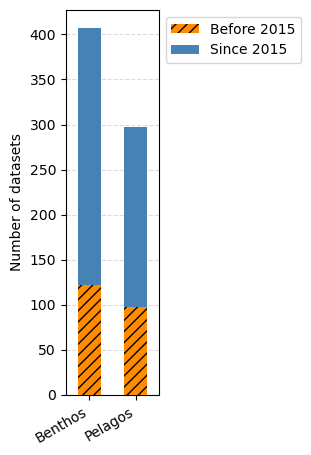

         Before 2015  Since 2015  Total
name                                   
Benthos          122         285    834
Pelagos           97         200    656


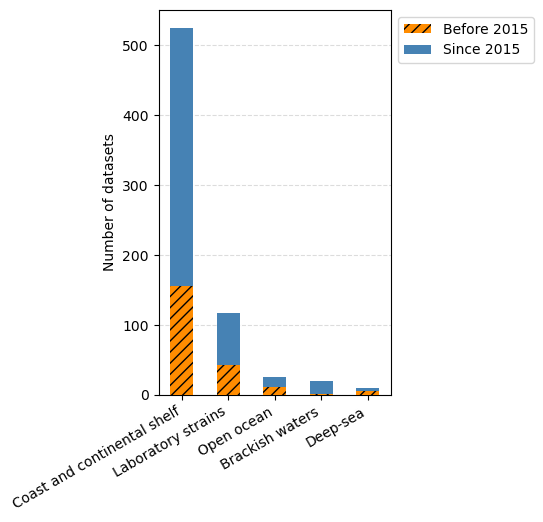

                             Before 2015  Since 2015  Total
name                                                       
Coast and continental shelf          156         368   1118
Laboratory strains                    43          74    237
Open ocean                            12          14     55
Brackish waters                        2          18     50
Deep-sea                               5           5     17


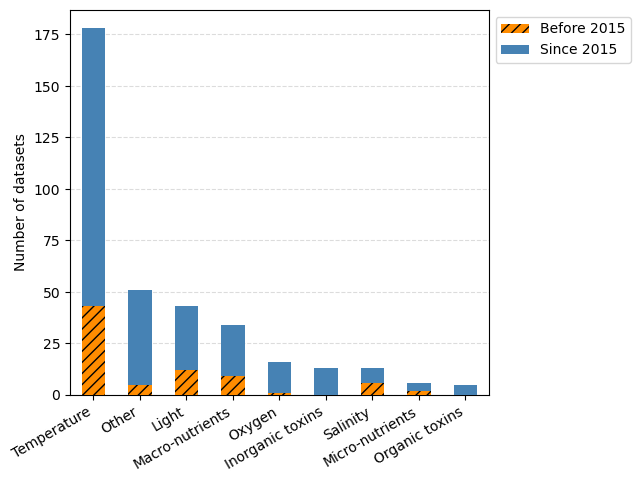

                  Before 2015  Since 2015  Total
name                                            
Temperature                43         135    368
Other                       5          46    107
Light                      12          31     96
Macro-nutrients             9          25     60
Oxygen                      1          15     37
Inorganic toxins            0          13     24
Salinity                    6           7     21
Micro-nutrients             2           4     16
Organic toxins              0           5      9


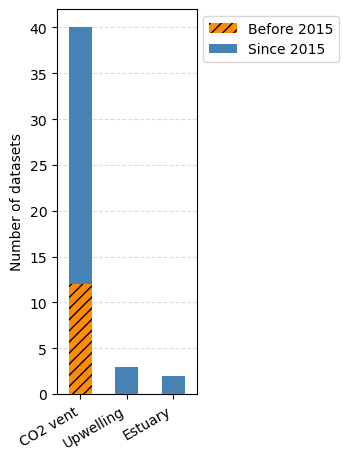

           Before 2015  Since 2015  Total
name                                     
CO2 vent            12          28     74
Upwelling            0           3      8
Estuary              0           2      7


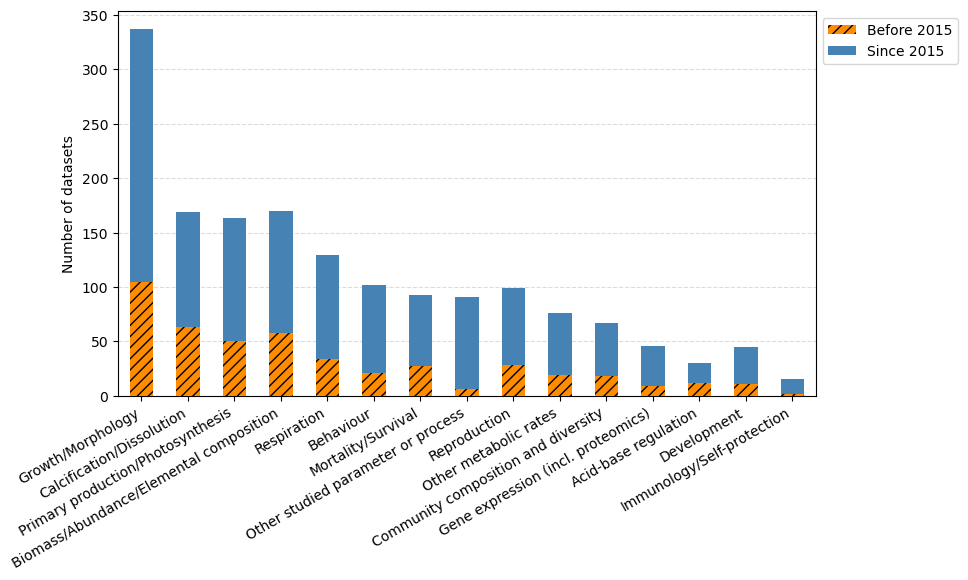

                                         Before 2015  Since 2015  Total
name                                                                   
Growth/Morphology                                105         232    698
Calcification/Dissolution                         63         106    372
Primary production/Photosynthesis                 50         113    355
Biomass/Abundance/Elemental composition           58         112    340
Respiration                                       34          95    286
Behaviour                                         21          81    212
Mortality/Survival                                27          66    192
Other studied parameter or process                 6          85    189
Reproduction                                      28          71    175
Other metabolic rates                             19          57    158
Community composition and diversity               18          49    149
Gene expression (incl. proteomics)                 9          37

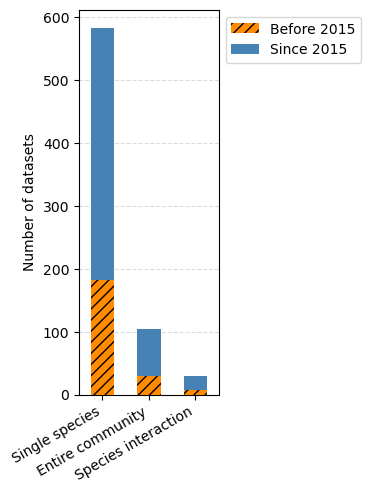

                     Before 2015  Since 2015  Total
name                                               
Single species               183         400   1204
Entire community              29          76    259
Species interaction            7          22     59


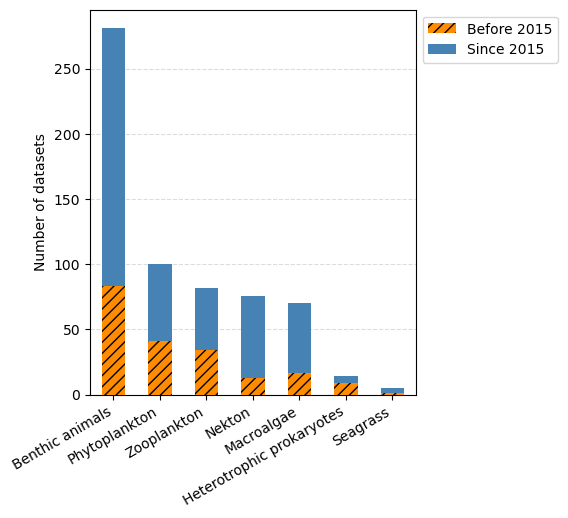

                           Before 2015  Since 2015  Total
name                                                     
Benthic animals                     83         198    564
Phytoplankton                       41          59    209
Zooplankton                         34          48    174
Nekton                              13          63    168
Macroalgae                          17          53    133
Heterotrophic prokaryotes            9           5     37
Seagrass                             1           4     15


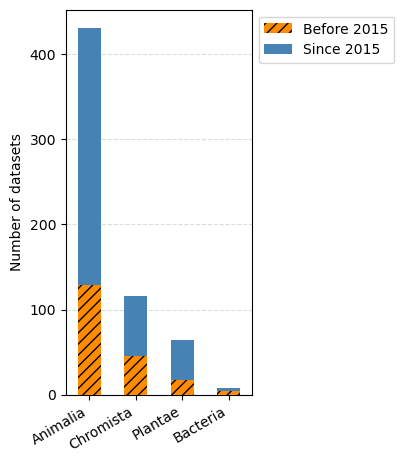

           Before 2015  Since 2015  Total
name                                     
Animalia           129         302    889
Chromista           45          71    238
Plantae             17          47    128
Bacteria             4           4     26


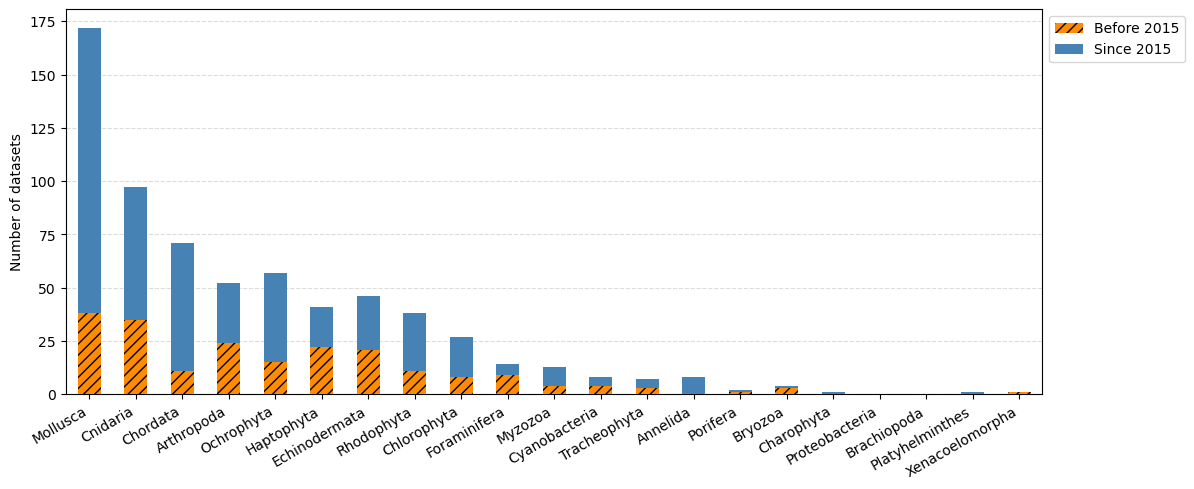

                 Before 2015  Since 2015  Total
name                                           
Mollusca                  38         134    328
Cnidaria                  35          62    203
Chordata                  11          60    154
Arthropoda                24          28    115
Ochrophyta                15          42    101
Haptophyta                22          19     95
Echinodermata             21          25     88
Rhodophyta                11          27     73
Chlorophyta                8          19     50
Foraminifera               9           5     32
Myzozoa                    4           9     23
Cyanobacteria              4           4     23
Tracheophyta               3           4     19
Annelida                   0           8     14
Porifera                   1           1      6
Bryozoa                    3           1      6
Charophyta                 0           1      5
Proteobacteria             0           0      3
Brachiopoda                0           0

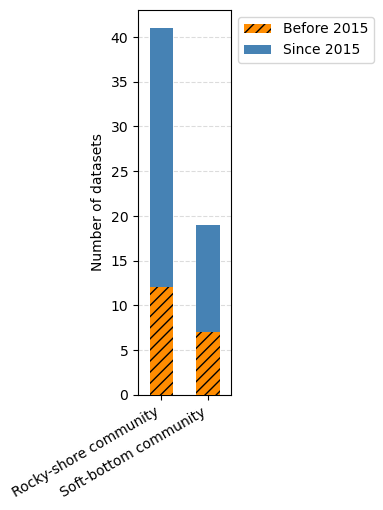

                       Before 2015  Since 2015  Total
name                                                 
Rocky-shore community           12          29     92
Soft-bottom community            7          12     41


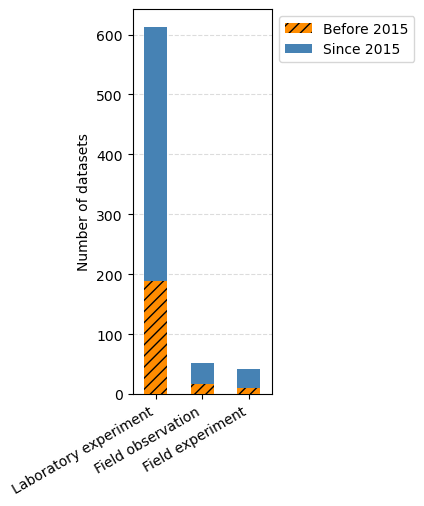

                       Before 2015  Since 2015  Total
name                                                 
Laboratory experiment          188         424   1276
Field observation               16          35    117
Field experiment                10          32    102


In [28]:
year = 2015

# All categories except
categories = df.columns
categories = categories.drop(['_id', 'citation_date', 'keyword', 'Targeted species'])

for category in categories :
#for category in ['Geographical location'] :

    dhisto = pd.DataFrame()
    
    listKeywords = dictCategory[category]

    for k in listKeywords:
        s_total = df[df[category].apply(lambda x: bool(set(x) & set([k])))]
        s_period1 = s_total[s_total['citation_date'].between('1950-01-01', str(year-1)+'-12-31')]
        s_period2 = s_total[s_total['citation_date'].between(str(year)+'-01-01', '2030-12-31')]
    
        dhisto = dhisto._append({ 'name': k, 
                             'Before ' + str(year): len(s_period1), 
                             'Since ' + str(year):  len(s_period2),
                             'Total':  len(s_total)}, 
                           ignore_index=True)

    dhisto.set_index('name', inplace=True)
    dhisto.sort_values(by='Total', inplace=True, ascending=False)
    
    dhistoFiltered = dhisto[dhisto['Total'] != 0]
    
    ax = dhistoFiltered.plot.bar(y=['Before ' + str(year), 'Since ' + str(year)], 
                                 figsize=[0.6*len(dhistoFiltered),5], width=0.5, 
                                 color=["darkorange", "steelblue"], legend=False,
                                 stacked=True, zorder=3, 
                                 xlabel="", ylabel="Number of datasets")
    ax.grid(axis='y', zorder=0, color='gainsboro', linestyle='--')
    for bar in ax.containers[0].patches:
        bar.set_hatch('///')
    ax.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.xticks(rotation=30, horizontalalignment='right')
    plt.savefig(category.replace(' ', '_') + '.png', 
                facecolor="white", transparent=False, bbox_inches="tight")
    plt.show()
    
    print(dhistoFiltered)